In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import time

In [2]:
train_data_dir = '/opt/ml/input/data/train/'

In [3]:
train_rating = pd.read_csv(os.path.join(train_data_dir, 'train_ratings.csv'))
# item info
writers = pd.read_csv(os.path.join(train_data_dir, 'writers.tsv'), sep='\t')
director = pd.read_csv(os.path.join(train_data_dir, 'directors.tsv'), sep='\t')
title = pd.read_csv(os.path.join(train_data_dir, 'titles.tsv'), sep='\t')
genre = pd.read_csv(os.path.join(train_data_dir, 'genres.tsv'), sep='\t')
year = pd.read_csv(os.path.join(train_data_dir, 'years.tsv'), sep='\t')

In [4]:
train_rating

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563
...,...,...,...
5154466,138493,44022,1260209449
5154467,138493,4958,1260209482
5154468,138493,68319,1260209720
5154469,138493,40819,1260209726


In [5]:
print('유저 id',train_rating['user'].unique())
print('총 유저수', train_rating['user'].nunique())
print('모든 유저가 본 총 영화 수', train_rating['item'].nunique())

유저 id [    11     14     18 ... 138486 138492 138493]
총 유저수 31360
모든 유저가 본 총 영화 수 6807


- time 이 unix시간으로 나타나 있으므로 변경
- year 만 유의미할 것이라고 판단 (영화의 개봉연도만 제공하기 때문)

In [6]:
def change_time(t):
    return time.strftime('%Y-%m-%d', time.localtime(t))

In [7]:
train_rating['datetime'] = train_rating['time'].apply(change_time)
train_rating['datetime'] = pd.to_datetime(train_rating['datetime'])
train_rating['year'] = train_rating['datetime'].dt.year
train_rating

,user,item,time,datetime,year
0,11,4643,1230782529,2009-01-01,2009
1,11,170,1230782534,2009-01-01,2009
2,11,531,1230782539,2009-01-01,2009
3,11,616,1230782542,2009-01-01,2009
4,11,2140,1230782563,2009-01-01,2009
...,...,...,...,...,...
5154466,138493,44022,1260209449,2009-12-07,2009
5154467,138493,4958,1260209482,2009-12-07,2009
5154468,138493,68319,1260209720,2009-12-07,2009
5154469,138493,40819,1260209726,2009-12-07,2009


--------

## item infomation

### writer 작가

In [8]:
writers

,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005
...,...,...
11301,27397,nm5371819
11302,2987,nm5927607
11303,33463,nm5927607
11304,2987,nm5927608


In [9]:
print(writers.shape)
print('결측치')
print(writers.isnull().sum())
print('영화 수',writers['item'].nunique())
print('작가 수', writers['writer'].nunique())


(11306, 2)
결측치
item      0
writer    0
dtype: int64
영화 수 5648
작가 수 2989


In [10]:
# 작가당 영화 참여수
writers['writer'].value_counts()

nm0000095    47
nm0000636    35
nm0000175    32
nm0372942    30
nm0000108    29
             ..
nm0414893     2
nm0414448     2
nm0414117     2
nm0414047     2
nm5927608     2
Name: writer, Length: 2989, dtype: int64

In [11]:
# 영화당 작가수
writers['item'].value_counts()

1907     24
783      23
364      21
2687     21
48322    19
         ..
79073     1
176       1
2560      1
42007     1
1237      1
Name: item, Length: 5648, dtype: int64

In [12]:
new_writers = writers.groupby(['item']).agg({'writer':'unique'})
new_writers

,writer
item,
1,"[nm0004056, nm0005124, nm0169505, nm0230032, n..."
2,"[nm0378144, nm0852430, nm0885575]"
3,[nm0425756]
4,[nm0060103]
5,"[nm0329304, nm0352443, nm0583600, nm0796124]"
...,...
118696,"[nm0001392, nm0101991, nm0866058, nm0868219, n..."
118900,[nm0394984]
118997,[nm0487567]


### director 감독

In [13]:
director

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005
...,...,...
5900,84273,nm2879822
5901,58376,nm2879822
5902,65225,nm2879822
5903,2394,nm9054338


In [14]:
print(director.shape)
print('결측치')
print(director.isnull().sum())
print('영화 수',director['item'].nunique())
print('작가 수', director['director'].nunique())

(5905, 2)
결측치
item        0
director    0
dtype: int64
영화 수 5503
작가 수 1340


In [15]:
# 영화당 작가 수
director['item'].value_counts()

50912    14
1282     10
27002     8
7502      7
596       7
         ..
163       1
70        1
6566      1
5504      1
55768     1
Name: item, Length: 5503, dtype: int64

In [16]:
# 작가당 영화 수
director['director'].value_counts()

nm0000095    44
nm0000033    33
nm0000142    31
nm0000229    29
nm0000217    26
             ..
nm0404606     2
nm0405605     2
nm0410139     2
nm0410769     2
nm9054338     2
Name: director, Length: 1340, dtype: int64

In [17]:
new_director = director.groupby(['item']).agg({'director':'unique'})
new_director

,director
item,
1,[nm0005124]
2,[nm0002653]
3,[nm0222043]
4,[nm0001845]
5,[nm0796124]
...,...
118696,[nm0001392]
118900,[nm0885249]
118997,[nm0551128]


### genre 장르

In [18]:
genre

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller
...,...,...
15928,109850,Drama
15929,8605,Action
15930,8605,Comedy
15931,3689,Comedy


In [19]:
print(genre.shape)
print('결측치')
print(genre.isnull().sum())
print('영화 수',genre['item'].nunique())
print('작가 수', genre['genre'].nunique())

(15933, 2)
결측치
item     0
genre    0
dtype: int64
영화 수 6807
작가 수 18


In [20]:
# 영화당 장르 수
genre['item'].value_counts()

81132     10
26701      8
4719       7
2987       7
56152      7
          ..
27329      1
86852      1
103624     1
97673      1
8130       1
Name: item, Length: 6807, dtype: int64

In [21]:
# 장르당 영화수
genre['genre'].value_counts()

Drama          3490
Comedy         2408
Thriller       1466
Romance        1251
Action         1246
Crime           924
Adventure       891
Sci-Fi          653
Horror          602
Fantasy         557
Mystery         471
Children        432
Animation       355
War             346
Documentary     323
Musical         282
Western         139
Film-Noir        97
Name: genre, dtype: int64

In [22]:
new_genre = genre.groupby(['item']).agg({'genre':'unique'})
new_genre

,genre
item,
1,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,"[Adventure, Children, Fantasy]"
3,"[Comedy, Romance]"
4,"[Comedy, Drama, Romance]"
5,[Comedy]
...,...
118700,[Drama]
118900,[Drama]
118997,"[Children, Comedy, Fantasy, Musical]"


### title 영화 제목

In [23]:
title

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)
...,...,...
6802,73106,American Pie Presents: The Book of Love (Ameri...
6803,109850,Need for Speed (2014)
6804,8605,Taxi 3 (2003)
6805,3689,Porky's II: The Next Day (1983)


In [24]:
print(title.shape)
print('결측치')
print(title.isnull().sum())

(6807, 2)
결측치
item     0
title    0
dtype: int64


### 데이터 병합

In [25]:
movie_df = pd.merge(title, year, how='left', on='item')
movie_df = pd.merge(movie_df, new_genre, how='left', on='item')
movie_df = pd.merge(movie_df, new_director, how='left', on='item')
movie_df = pd.merge(movie_df, new_writers, how='left', on='item')
movie_df

,item,title,year,genre,director,writer
0,318,"Shawshank Redemption, The (1994)",1994.0,"[Crime, Drama]",[nm0001104],"[nm0000175, nm0001104]"
1,2571,"Matrix, The (1999)",1999.0,"[Action, Sci-Fi, Thriller]","[nm0905152, nm0905154]","[nm0905152, nm0905154]"
2,2959,Fight Club (1999),1999.0,"[Action, Crime, Drama, Thriller]",[nm0000399],"[nm0657333, nm0880243]"
3,296,Pulp Fiction (1994),1994.0,"[Comedy, Crime, Drama, Thriller]",[nm0000233],"[nm0000233, nm0000812]"
4,356,Forrest Gump (1994),1994.0,"[Comedy, Drama, Romance, War]",[nm0000709],[nm0744839]
...,...,...,...,...,...,...
6802,73106,American Pie Presents: The Book of Love (Ameri...,2009.0,[Comedy],[nm0003289],"[nm0381221, nm0825738]"
6803,109850,Need for Speed (2014),2014.0,"[Action, Crime, Drama]",[nm0915304],[nm0309691]
6804,8605,Taxi 3 (2003),2003.0,"[Action, Comedy]",[nm0470443],[nm0000108]
6805,3689,Porky's II: The Next Day (1983),1983.0,[Comedy],[nm0163706],"[nm0163706, nm0650276]"


In [27]:
# 결측치 확인
movie_df.isnull().sum()

item           0
title          0
year           8
genre          0
director    1304
writer      1159
dtype: int64

- 감독과 작가의 결측치가 생각보다 많음 (사용하기 애매할수도 있음)
- 개봉연도의 경우 title에 추가 정보로 채울 수 있음

In [39]:
none_year_idx = movie_df[movie_df['year'].isnull()].index

In [48]:
none_year_movie_df = movie_df.iloc[none_year_idx][['item', 'title']].reset_index(drop=True)
none_year_movie_df

,item,title
0,6987,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ..."
1,3310,"Kid, The (1921)"
2,7065,"Birth of a Nation, The (1915)"
3,7243,Intolerance: Love's Struggle Throughout the Ag...
4,8511,"Immigrant, The (1917)"
5,6988,Broken Blossoms or The Yellow Man and the Girl...
6,32898,"Trip to the Moon, A (Voyage dans la lune, Le) ..."
7,119145,Kingsman: The Secret Service (2015)


In [56]:
none_year_movie_dict = dict([ (i, int(t[t.rfind('(')+1:-1])) for i,t in none_year_movie_df.values])

In [57]:
movi[movie_df['item'] == 318]

,item,title,year,genre,director,writer
0,318,"Shawshank Redemption, The (1994)",1994.0,"[Crime, Drama]",[nm0001104],"[nm0000175, nm0001104]"
1,2571,"Matrix, The (1999)",1999.0,"[Action, Sci-Fi, Thriller]","[nm0905152, nm0905154]","[nm0905152, nm0905154]"
2,2959,Fight Club (1999),1999.0,"[Action, Crime, Drama, Thriller]",[nm0000399],"[nm0657333, nm0880243]"
3,296,Pulp Fiction (1994),1994.0,"[Comedy, Crime, Drama, Thriller]",[nm0000233],"[nm0000233, nm0000812]"
4,356,Forrest Gump (1994),1994.0,"[Comedy, Drama, Romance, War]",[nm0000709],[nm0744839]
...,...,...,...,...,...,...
6802,73106,American Pie Presents: The Book of Love (Ameri...,2009.0,[Comedy],[nm0003289],"[nm0381221, nm0825738]"
6803,109850,Need for Speed (2014),2014.0,"[Action, Crime, Drama]",[nm0915304],[nm0309691]
6804,8605,Taxi 3 (2003),2003.0,"[Action, Comedy]",[nm0470443],[nm0000108]
6805,3689,Porky's II: The Next Day (1983),1983.0,[Comedy],[nm0163706],"[nm0163706, nm0650276]"


In [ ]:
movie_df.iloc[]

-------

## 생각해볼 점 (1) 유저의 활동시기 보다 한참후에 개봉한 영화를 추천해주는 것이 맞을까?

예를들어 35번 유저의 정보를 보면 2007~2008년까지의 데이터가 존재함

In [29]:
train_rating['user'].unique()[5]

35

In [30]:
train_rating[train_rating['user'] == train_rating['user'].unique()[5]]['year'].unique()

array([2006, 2008])

목록에 있는 영화들의 개봉연도는 1922~2014년

In [31]:
year['year'].unique()

array([1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014])

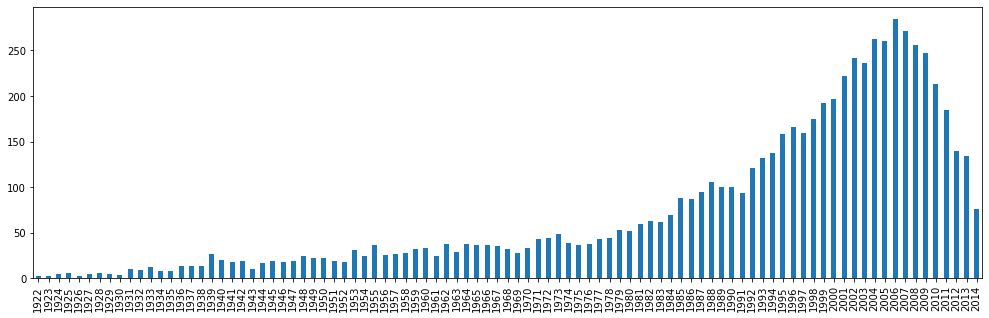

In [32]:
fig, ax = plt.subplots(figsize=(17,5))

year['year'].value_counts().sort_index().plot.bar(ax=ax)

plt.show()

ex) 이 경우에 35번 유저에게 마지막 사용연도(2008년) 보다 한참 후인 2014년의 영화가 추천되는 것이 옳은가?   
(35번 유저가 2014년에는 없는 이탈유저라면..?)

-------

## 생각해볼 점 (2) 영화를 많이 본 유저와 적게 본 유저에게 같은 방법으로 영화추천을 해도 될까?

유저의 영화 시청수를 보게되면 16~2912개 까지 차이가 많이 나는 것을 볼 수 있다   
하지만 평균은 164개로 편향이 심한것을 볼 수 있다

In [33]:
train_rating['user'].value_counts().describe()

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
Name: user, dtype: float64

In [34]:
user_item_count = train_rating.groupby(['user'])['item'].agg('count').values.tolist()

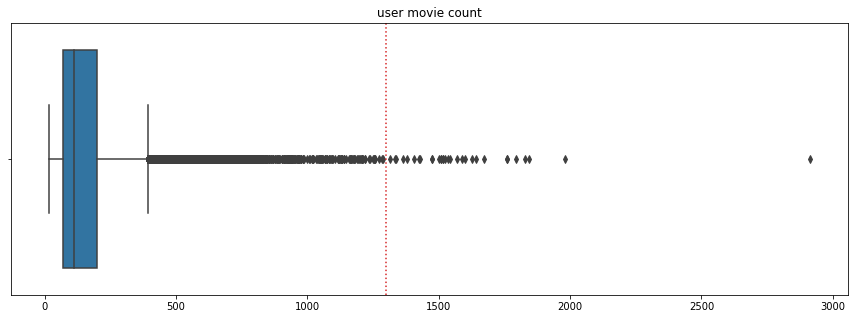

In [35]:
fig, ax = plt.subplots(figsize=(15,5))

sns.boxplot(x=user_item_count, ax=ax)
ax.axvline(x=1300, color='tab:red', ls='dotted')

ax.set_title('user movie count')
plt.show()

이상치에 해당하는 유저(영화를 많이 본 유저)의 수가 많지는 않지만 이런 유저들에게는 다른 기준으로 추천을 해주는 것이 맞지 않을지?   
(이정도로 영화를 많이 봤으면 아무거나 추천해준다던지, content 기반으로 추천을 한다던지, 다른 유저들도 많이본 영화 중 안본걸 추천해준다던지 등)   
또한, 1500개를 본 유저와 500개를 본 유저도 차이점을 둬야할지?

--------------

## 생각해볼 점 (3) 유저들이 많이보지 않은 영화를 추천해 줘도 괜찮을까?